In [1]:
import csv
import matplotlib.pyplot as plt
import numpy as np
import os
from skimage import transform,feature,exposure
import pickle
# from IPython.display import Image
# from skimage.io import imread
# plt.ioff()

# classification required packages

from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.svm import SVC,LinearSVC
from sklearn.externals import joblib


In [2]:
def readTrafficSigns(rootpath):
    images = [] # images
    labels = [] # corresponding labels
    for c in range(0,43):
        prefix = rootpath + '/' + format(c, '05d') + '/' # subdirectory for class
        gtFile = open(prefix + 'GT-'+ format(c, '05d') + '.csv') # annotations file
        gtReader = csv.reader(gtFile, delimiter=';') # csv parser for annotations file
        gtReader.next() # skip header
        # loop over all images in current annotations file
        for row in gtReader:
            images.append(plt.imread(prefix + row[0])) # the 1th column is the filename
            labels.append(row[7]) # the 8th column is the label
        gtFile.close()
#         print "Hii"
    return images, labels
        

# print trainLabels[0]
# print len(trainImages[0])
# print len(trainImages)
# print trainImages[0]

In [3]:
def rgb2gray(rgb):

    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
#     print ( "r=",r)
#     print ( "g=",g)
#     print ( "b=",b)
    
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
    return gray


def showimg_n_hog(grayimg,hogImage):
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 10), sharex=True, sharey=True)

    ax1.axis('off')
    ax1.imshow(grayimg)
    ax1.set_title('Input image')
    ax1.set_adjustable('box-forced')

    ax2.axis('off')
    ax2.imshow(hogImage, cmap=plt.cm.gray)
    ax2.set_title('Histogram of Oriented Gradients')
    ax1.set_adjustable('box-forced')
    plt.show()

In [4]:
if os.path.isfile("Image_n_Labels/trainImages.npy") &  os.path.isfile("Image_n_Labels/trainLabels.npy") :
    X = np.load("Image_n_Labels/trainImages.npy")
    y = np.load("Image_n_Labels/trainLabels.npy")
    print("[INFO] Training images and labels are loaded in variables ==> X,y")
    print("[INFO] Number of training Images {} \nNumber of Labels {}".format(len(X), len(y)))
    
else:
    trainImages, trainLabels =readTrafficSigns("/home/rupali/Desktop/project/GTSRB/dataset/GTSRB/Final_Training/Images")
    np.save("Image_n_Labels/trainImages.npy",trainImages)
    np.save("Image_n_Labels/trainLabels.npy",trainLabels)
    print("[INFO] training images and labels are read from the dataset directory")
    print("[INFO] training images saved to Image_n_Labels/trainingImages.npy for further use")
    print("[INFO] training labels saved to Image_n_Labels/trainingLabels.npy for further use")
    X = np.load("Image_n_Labels/trainImages.npy")
    y = np.load("Image_n_Labels/trainLabels.npy")

[INFO] training images and labels are read from the dataset directory
[INFO] training images saved to Image_n_Labels/trainingImages.npy for further use
[INFO] training labels saved to Image_n_Labels/trainingLabels.npy for further use


In [5]:
def get_csv(path):
    return [os.path.join(path,f) for f in os.listdir(path) if f.endswith('.csv')]

In [6]:
def loadtestimages_from_path(testpath):
    print("[INFO] reading all test images from directory\n")
    filename = testpath+"/new.csv"
    raw_data = open(filename, 'rt')
    reader = csv.reader(raw_data, delimiter=';')
    reader.next()
#     print reader[1]
    testfiles = list(reader)
    timg = []
    testimg = []
    for row in testfiles:
        fname = os.path.join(testpath,row[0])
        timg.append(fname)
        testimg.append(plt.imread(fname))
    return timg,testimg

#     print("[INFO] reading all test images from directory\n")
#     gtFile = get_csv(testpath)
#     filename = gtFile[0]
#     raw_data = open(filename, 'rt')
#     reader = csv.reader(raw_data, delimiter=';', quoting=csv.QUOTE_NONE)
#     reader.next()
#     testfiles = list(reader)
#     timg = []
#     testimg = []
# #     tlbl = []
#     for i in testfiles:
#     #     print (i[0],i[-1])
#         fname = os.path.join(testpath,i[0])
#         timg.append(fname)
#         tim = plt.imread(fname)
#         testimg.append(tim)
# #         label = i[-1]
# #         tlbl.append(label)
#     np.save("Image_n_Labels/testimagenames.npy",timg)
#     np.save("Image_n_Labels/testimages.npy",testimg)
# #     np.save("Image_n_Labels/testimagelabels.npy",tlbl)
#     return timg,testimg
    

In [7]:
if (os.path.isfile("Image_n_Labels/testimagenames.npy") &  os.path.isfile("Image_n_Labels/testimages.npy")):
    print("[INFO] loading from .npy\n")
    timg = np.load("Image_n_Labels/testimagenames.npy")
    testimg = np.load("Image_n_Labels/testimages.npy")
    print("[INFO] DONE!loaded from .npy\n")
    print("[INFO] Training images and labels are loaded in variables ==> X,y")
    print("[INFO] Number of training Images {} \nNumber of Labels {}".format(len(timg), len(testimg)))
else:
    testpath="/home/rupali/Desktop/project/GTSRB/dataset/GTSRB_test/Final_Test/small"
    timg,testimg = loadtestimages_from_path(testpath)
    np.save("Image_n_Labels/testimagenames.npy",timg)
    np.save("Image_n_Labels/testimages.npy",testimg)
    
    
    

[INFO] reading all test images from directory



[INFO] There are total 26 test images availabe
[INFO] Example /home/rupali/Desktop/project/GTSRB/dataset/GTSRB_test/Final_Test/small/00062.ppm


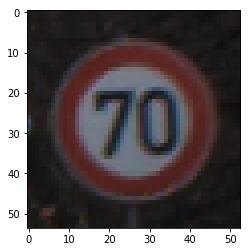

In [8]:
print("[INFO] There are total {} test images availabe".format(len(timg)))
print("[INFO] Example {}".format(timg[4]))
# plt.plot()
plt.imshow(plt.imread(timg[4]))
plt.show()
# Image(filename='/home/rupali/Desktop/project/GTSRB/dataset/GTSRB_test/Final_Test/small/00034.ppm') 


In [9]:
y.astype("float")

array([  0.,   0.,   0., ...,  42.,  42.,  42.])

In [10]:
n = np.random.randint(0,len(X))
i1 = X[29]
grayim = rgb2gray(i1)
# print (grayim)
gI1 = transform.resize(grayim,(40,40))
# print (gI1)

(H, hogImage) = feature.hog(gI1, orientations=9, pixels_per_cell=(4,4),
    cells_per_block=(2, 2), transform_sqrt=True, visualise=True)

hogImage = exposure.rescale_intensity(hogImage, out_range=(0, 255)).astype("uint8")

# showimg_n_hog(gI1, hogImage)
print H
print(len(H))



/home/rupali/anaconda2/lib/python2.7/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


[ 0.          0.00095458  0.00165896 ...,  0.00961999  0.03594479
  0.0080587 ]
2916


/home/rupali/anaconda2/lib/python2.7/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


In [11]:
if os.path.isfile("HoGFeatures/HoGfeatures.npy") & os.path.isfile("HoGFeatures/HoGvisualize.npy") :
    print("[INFO] loading from file ... ")
    hogfeat = np.load("HoGFeatures/HoGfeatures.npy")
    hogviz = np.load("HoGFeatures/HoGvisualize.npy")
    
    print("HoG features are loaded from HoGfeatures.npy to variable ==> hogfeat")
    print("HoG visualizations are loaded from HoGvisualize.npy to variable ==> hogviz")
    
else:
    Hviz=[]
    Hfeat=[]
    print("[INFO] HoGfeatures.npy does not exist")
    for i in range(len(X)):
        if i > 0 and i % 1000 == 0:
            print("[INFO] processed {}/{}".format(i, len(X)))
        i1 = X[i]
        grayim = rgb2gray(i1)
        # print (grayim)
        gI1 = transform.resize(grayim,(40,40))
        # print (gI1)
        (H, hogImage) = feature.hog(gI1, orientations=9, pixels_per_cell=(4,4),cells_per_block=(2, 2), transform_sqrt=True, visualise=True)
        hogImage = exposure.rescale_intensity(hogImage, out_range=(0, 255)).astype("uint8")

        Hviz.append(hogImage)
        Hfeat.append(H)

    np.save("HoGFeatures/HoGfeatures.npy", Hfeat)
    np.save("HoGFeatures/HoGvisualize.npy", Hviz)
    print("[INFO] HoGfeatures.npy are saved")  
    print("[INFO] HoGvisualize.npy are saved")
    hogfeat = np.load("HoGFeatures/HoGfeatures.npy")
    hogviz = np.load("HoGFeatures/HoGvisualize.npy")
print (hogfeat.shape)

[INFO] HoGfeatures.npy does not exist
[INFO] processed 1000/39209
[INFO] processed 2000/39209
[INFO] processed 3000/39209
[INFO] processed 4000/39209
[INFO] processed 5000/39209
[INFO] processed 6000/39209
[INFO] processed 7000/39209
[INFO] processed 8000/39209
[INFO] processed 9000/39209
[INFO] processed 10000/39209
[INFO] processed 11000/39209
[INFO] processed 12000/39209
[INFO] processed 13000/39209
[INFO] processed 14000/39209
[INFO] processed 15000/39209
[INFO] processed 16000/39209
[INFO] processed 17000/39209
[INFO] processed 18000/39209
[INFO] processed 19000/39209
[INFO] processed 20000/39209
[INFO] processed 21000/39209
[INFO] processed 22000/39209
[INFO] processed 23000/39209
[INFO] processed 24000/39209
[INFO] processed 25000/39209
[INFO] processed 26000/39209
[INFO] processed 27000/39209
[INFO] processed 28000/39209
[INFO] processed 29000/39209
[INFO] processed 30000/39209
[INFO] processed 31000/39209
[INFO] processed 32000/39209
[INFO] processed 33000/39209
[INFO] process

In [12]:
if os.path.isfile("HoGFeatures/HoGfeatures_test.npy") & os.path.isfile("HoGFeatures/HoGvisualize_test.npy") :
    hogfeat_test = np.load("HoGFeatures/HoGfeatures_test.npy")
    hogviz_test = np.load("HoGFeatures/HoGvisualize_test.npy")
    
    print("HoG features are loaded from HoGfeatures_test.npy to variable ==> hogfeat_test")
    print("HoG visualizations are loaded from HoGvisualize_test.npy to variable ==> hogviz_test")
else:
    print("HoGfeatures_test.npy does not found")
    Hviz = []
    Hfeat = []
    for i in range(0,len(testimg)):
        # show an update every 1,000 images
        if i > 0 and i % 10 == 0:
            print("[INFO] processed {}/{}".format(i, len(testimg)))
        I = testimg[i]
        grayim = rgb2gray(I)
        grayim = transform.resize(grayim,(40,40))

        (H_4x4, hogImage) = feature.hog(grayim, orientations=9, pixels_per_cell=(4, 4),
            cells_per_block=(2, 2), transform_sqrt=True, visualise=True)
        hogImage = exposure.rescale_intensity(hogImage, out_range=(0, 255)).astype("uint8")
    #         hogImage = hogImage.astype("uint8")
        Hviz.append(hogImage)
        Hfeat.append(H_4x4)
        # save the features using numpy save with .npy extention 
        # which reduced the storage space by 4times compared to pickle
    np.save("HoGFeatures/HoGfeatures_test.npy", Hfeat)
    np.save("HoGFeatures/HoGvisualize_test.npy", Hviz)
    print("HoGfeatures_test.npy are saved")  
    print("HoGvisualize_test.npy are saved")
    hogfeat_test = np.load("HoGFeatures/HoGfeatures_test.npy")
    hogviz_test = np.load("HoGFeatures/HoGvisualize_test.npy")
print (hogfeat_test.shape)

HoGfeatures_test.npy does not found
[INFO] processed 10/26
[INFO] processed 20/26
HoGfeatures_test.npy are saved
HoGvisualize_test.npy are saved
(26, 2916)


In [13]:
Xhog = np.array(hogfeat).astype("float")
y = y.astype("float")
print(Xhog.shape,y.shape)
print(np.unique(y))


((39209, 2916), (39209,))
[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.
  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.  29.
  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.  42.]


In [14]:
X_t = np.array(hogfeat_test).astype("float")
print(X_t.shape)

(26, 2916)


In [15]:
print(y.shape)
print (y)
for i in range(0,len(np.unique(y))):
    yi = np.where(y==i)
    print("label: {}  \n indices: {} ".format(i,yi))
#     break

(39209,)
[  0.   0.   0. ...,  42.  42.  42.]
label: 0  
 indices: (array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 1

label: 15  
 indices: (array([23040, 23041, 23042, 23043, 23044, 23045, 23046, 23047, 23048,
       23049, 23050, 23051, 23052, 23053, 23054, 23055, 23056, 23057,
       23058, 23059, 23060, 23061, 23062, 23063, 23064, 23065, 23066,
       23067, 23068, 23069, 23070, 23071, 23072, 23073, 23074, 23075,
       23076, 23077, 23078, 23079, 23080, 23081, 23082, 23083, 23084,
       23085, 23086, 23087, 23088, 23089, 23090, 23091, 23092, 23093,
       23094, 23095, 23096, 23097, 23098, 23099, 23100, 23101, 23102,
       23103, 23104, 23105, 23106, 23107, 23108, 23109, 23110, 23111,
       23112, 23113, 23114, 23115, 23116, 23117, 23118, 23119, 23120,
       23121, 23122, 23123, 23124, 23125, 23126, 23127, 23128, 23129,
       23130, 23131, 23132, 23133, 23134, 23135, 23136, 23137, 23138,
       23139, 23140, 23141, 23142, 23143, 23144, 23145, 23146, 23147,
       23148, 23149, 23150, 23151, 23152, 23153, 23154, 23155, 23156,
       23157, 23158, 23159, 23160, 23161, 23162, 23163, 23164, 2316

In [16]:
features = Xhog
labels = y
Xtest = X_t

# take the  data and construct the training and testing split, using 75% of the
# data for training and 25% for testing
(trainData, testData, trainLabels, testLabels) = train_test_split(features,
    labels, test_size=0.25, random_state=42)
 
# now, let's take 10% of the training data and use that for validation
(trainData, valData, trainLabels, valLabels) = train_test_split(trainData, trainLabels,
    test_size=0.1, random_state=84)
 
# show the sizes of each data split
print("training data points: {}".format(len(trainLabels)))
print("validation data points: {}".format(len(valLabels)))
print("testing data points: {}".format(len(testLabels)))

training data points: 26465
validation data points: 2941
testing data points: 9803


In [17]:
# MLP
if os.path.isfile("clf/clf_svc_hog.pkl"):
    print("[INFO] loading classifier: SVC trained on HoG features...")
    svc = joblib.load("clf/clf_svc_hog.pkl")
    print("[INFO] Classifer is loaded as instance ::svc::")
else:
    print("[INFO] pre-trained classifier not found. \n Training Classifier SVC")
    svc = LinearSVC()
    svc.fit(trainData,trainLabels)
    print("[INFO] Succefully trained the classsifier. \n Saving the classifier for further use")
#     svc.fit(trainData,trainLabels)
    joblib.dump(svc, 'clf/clf_svc_hog.pkl') 
    

[INFO] pre-trained classifier not found. 
 Training Classifier SVC
[INFO] Succefully trained the classsifier. 
 Saving the classifier for further use


In [18]:
cv_score = cross_val_score(svc,testData,testLabels,cv=5)
print cv_score
print("mean cross-validation score: {}".format(np.mean(cv_score)))

[ 0.95955511  0.95230847  0.94897959  0.9564326   0.95419454]
mean cross-validation score: 0.954294062809


In [19]:
print (Xtest.shape)
svc.predict(Xtest)

(26, 2916)


array([ 1.,  4.,  1.,  2.,  4.,  3.,  2.,  2.,  4.,  1.,  4.,  2.,  2.,
        1.,  4.,  2.,  2.,  2.,  2.,  2.,  4.,  4.,  1.,  1.,  1.,  2.])